## Develop Hough Transform

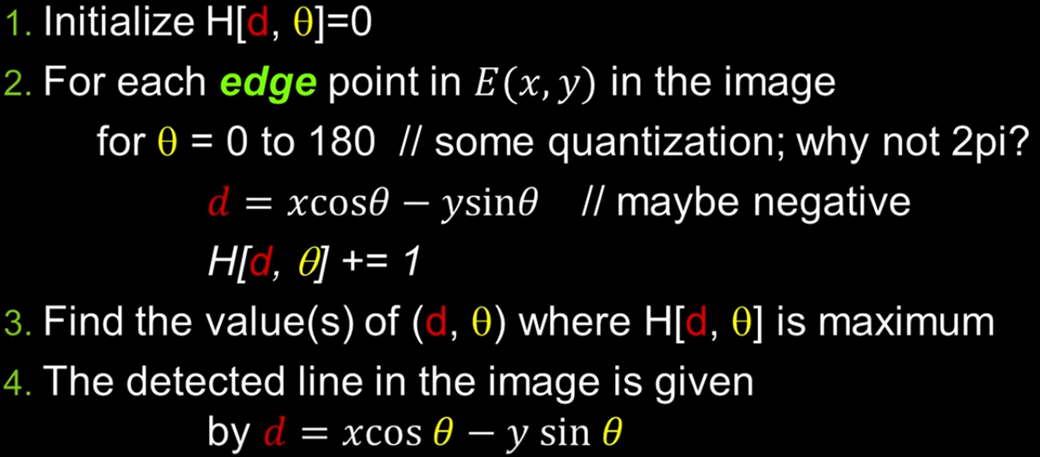

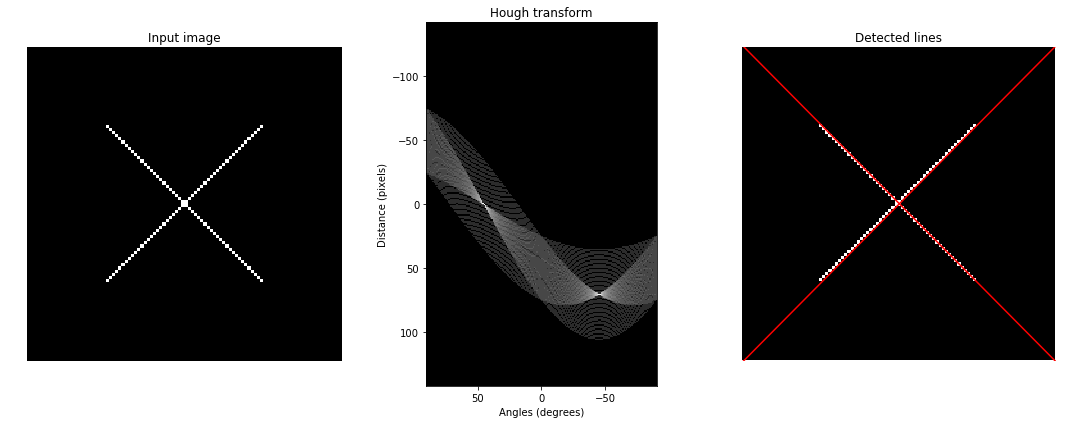

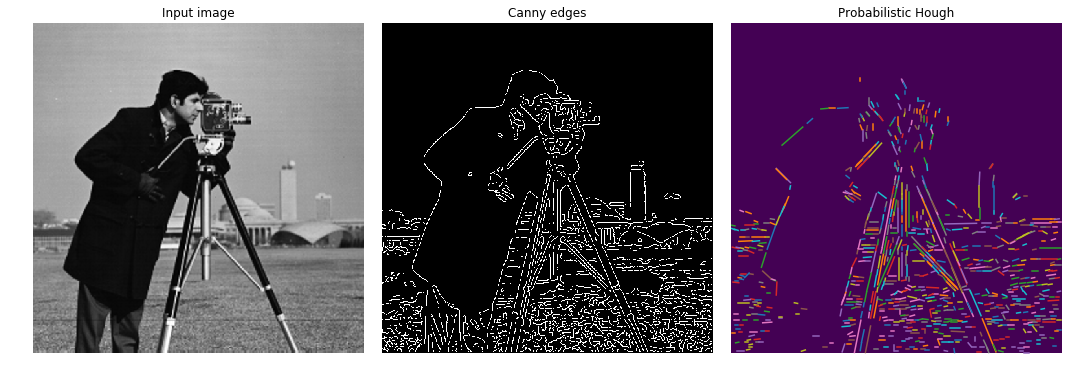

In [2]:
import numpy as np

from skimage.transform import (hough_line, hough_line_peaks,
                               probabilistic_hough_line)
from skimage.feature import canny
from skimage import data

import matplotlib.pyplot as plt
from matplotlib import cm


# Constructing test image
image = np.zeros((100, 100))
idx = np.arange(25, 75)
image[idx[::-1], idx] = 255
image[idx, idx] = 255

# Classic straight-line Hough transform
h, theta, d = hough_line(image)

# Generating figure 1
fig, axes = plt.subplots(1, 3, figsize=(15, 6),
                         subplot_kw={'adjustable': 'box-forced'})
ax = axes.ravel()

ax[0].imshow(image, cmap=cm.gray)
ax[0].set_title('Input image')
ax[0].set_axis_off()

ax[1].imshow(np.log(1 + h),
             extent=[np.rad2deg(theta[-1]), np.rad2deg(theta[0]), d[-1], d[0]],
             cmap=cm.gray, aspect=1/1.5)
ax[1].set_title('Hough transform')
ax[1].set_xlabel('Angles (degrees)')
ax[1].set_ylabel('Distance (pixels)')
ax[1].axis('image')

ax[2].imshow(image, cmap=cm.gray)
for _, angle, dist in zip(*hough_line_peaks(h, theta, d)):
    y0 = (dist - 0 * np.cos(angle)) / np.sin(angle)
    y1 = (dist - image.shape[1] * np.cos(angle)) / np.sin(angle)
    ax[2].plot((0, image.shape[1]), (y0, y1), '-r')
ax[2].set_xlim((0, image.shape[1]))
ax[2].set_ylim((image.shape[0], 0))
ax[2].set_axis_off()
ax[2].set_title('Detected lines')

plt.tight_layout()
plt.show()

# Line finding using the Probabilistic Hough Transform
image = data.camera()
edges = canny(image, 2, 1, 25)
lines = probabilistic_hough_line(edges, threshold=10, line_length=5,
                                 line_gap=1)

# Generating figure 2
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(image, cmap=cm.gray)
ax[0].set_title('Input image')

ax[1].imshow(edges, cmap=cm.gray)
ax[1].set_title('Canny edges')

ax[2].imshow(edges * 0)
for line in lines:
    p0, p1 = line
    ax[2].plot((p0[0], p1[0]), (p0[1], p1[1]))
ax[2].set_xlim((0, image.shape[1]))
ax[2].set_ylim((image.shape[0], 0))
ax[2].set_title('Probabilistic Hough')

for a in ax:
    a.set_axis_off()
    a.set_adjustable('box-forced')

plt.tight_layout()
plt.show()

In [ ]:
import cv2
import numpy as np

img = cv2.imread('wall.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150,apertureSize = 3)
edges = cv2.Canny(gray,100,200,apertureSize = 3)
cv2.imshow('edges',edges)
cv2.waitKey(0)

lines = cv2.HoughLines(edges,1,np.pi/180,200)
for rho,theta in lines[0]:
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))

    cv2.line(img,(x1,y1),(x2,y2),(0,0,255),2)

cv2.imshow('houghlines3.jpg',img)
cv2.waitKey(0)

In [ ]:
import cv2
import numpy as np
from skimage import data
#img = data.camera()
img = cv2.imread('wall.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)


edges = cv2.Canny(gray,100,200,apertureSize = 3)
cv2.imshow('edges',edges)
cv2.waitKey(0)

minLineLength = 30
maxLineGap = 10
lines = cv2.HoughLinesP(edges,1,np.pi/180,15,minLineLength,maxLineGap)
for x in range(0, len(lines)):
    for x1,y1,x2,y2 in lines[x]:
        cv2.line(img,(x1,y1),(x2,y2),(0,0,255),2)

cv2.imshow('hough',img)
cv2.waitKey(0)

In [6]:
import numpy as np
from sympy import *

# Create image with 20x20 pixel
img = np.zeros((20,20), dtype=np.int)
# Draw 2 lines correspond with above image
# Every pixel lies on a line will have value of 1
# Draw line d1, length = 15
for i in range(0,15):
    img[i+1][7]=1
# Draw line d2, length = 8
for i in range(11,19):
    img[12][i]=1

# Create a 2D array to holds the value of rho and theta
mask = np.zeros((28,91), dtype=np.int)

# Scan image to find some lines
for x in range(20):
    for y in range(20):
        if(img[x][y]==1):
            for rho in range(28):
                for theta in range(0,91):
                    if(rho==y*cos(theta*pi/180) + x*sin(theta*pi/180)
                        mask[rho][theta] += 1

# Print the value of M[7][0] and M[12][90] to see the length of d1 and d2
print M[7][0]
# Result: 15
print M[12][90]
# Result: 8

SyntaxError: invalid syntax (<ipython-input-6-7f6c65d6b4dc>, line 25)

In [16]:
import numpy as np
def build_hough_space_fom_image(img, shape = (100, 300), val = 1):
    hough_space = np.zeros(shape)
    for i, row in enumerate(img):
        for j, pixel in enumerate(row):   
            if pixel != val : continue
        hough_space = add_to_hough_space_polar((i,j), hough_space)
    return hough_space
def add_to_hough_space_polar(p, feature_space):
    space = np.linspace(0, pi, len(feature_space))
    d_max = len(feature_space[0]) / 2
    for i in range(len(space)):
        theta = space[i]
        d = int(p[0] * sin(theta) + p[1] * cos(theta)) + d_max
        if (d >= d_max * 2) : continue
        feature_space[i, d] += 1
    return feature_space

In [17]:
import numpy as np
from skimage import data
img = data.camera()
build_hough_space_fom_image(img)

NameError: name 'pi' is not defined

In [ ]:
# imports
import numpy as np
import cv2
import matplotlib.pyplot as plt


# The Hough Transform is a popular algorithm for detecting any shape that can
# be represented in a parametric mathmatical form in binary images. This
# usually means that images need to be thresholded or filtered prior to running
# the Hough Transform.

# read in shapes image and convert to grayscale
shapes = cv2.imread('ch.png')
#cv2.imshow('Original Image', shapes)
#cv2.waitKey(0)
#cv2.destroyAllWindows()
shapes_grayscale = cv2.cvtColor(shapes, cv2.COLOR_RGB2GRAY)

# blur image (this will help clean up noise for Canny Edge Detection)
shapes_blurred = cv2.GaussianBlur(shapes_grayscale, (5, 5), 1.5)

# find Canny Edges and show resulting image
canny_edges = cv2.Canny(shapes_blurred, 100, 200)
#cv2.imshow('Canny Edges', canny_edges)
#cv2.waitKey(0)
#cv2.destroyAllWindows()
########################################### HOUGH LINES FROM SCRATCH USING NUMPY
# Step 1: The Hough transform needs a binary edges images.  For this particular
# python file, I used the openCV built in Class Canny to create this edge image
# from the original shapes.png file.

# This is the function that will build the Hough Accumulator for the given image
def hough_lines_acc(img, rho_resolution=1, theta_resolution=1):
    ''' A function for creating a Hough Accumulator for lines in an image. '''
    height, width = img.shape # we need heigth and width to calculate the diag
    img_diagonal = np.ceil(np.sqrt(height**2 + width**2)) # a**2 + b**2 = c**2
    rhos = np.arange(-img_diagonal, img_diagonal + 1, rho_resolution)
    thetas = np.deg2rad(np.arange(-90, 90, theta_resolution))

    # create the empty Hough Accumulator with dimensions equal to the size of
    # rhos and thetas
    H = np.zeros((len(rhos), len(thetas)), dtype=np.uint64)
    y_idxs, x_idxs = np.nonzero(img) # find all edge (nonzero) pixel indexes

    for i in range(len(x_idxs)): # cycle through edge points
        x = x_idxs[i]
        y = y_idxs[i]

        for j in range(len(thetas)): # cycle through thetas and calc rho
            rho = int((x * np.cos(thetas[j]) +
                       y * np.sin(thetas[j])) + img_diagonal)
            H[rho, j] += 1

    return H, rhos, thetas


# This more advance Hough peaks funciton has threshold and nhood_size arguments
# threshold will threshold the peak values to be above this value if supplied,
# where as nhood_size will surpress the surrounding pixels centered around
# the local maximum after that value has been assigned as a peak.  This will
# force the algorithm to look eslwhere after it's already selected a point from
# a 'pocket' of local maxima.
def hough_peaks(H, num_peaks, threshold=0, nhood_size=3):
    ''' A function that returns the indicies of the accumulator array H that
        correspond to a local maxima.  If threshold is active all values less
        than this value will be ignored, if neighborhood_size is greater than
        (1, 1) this number of indicies around the maximum will be surpessed. '''
    # loop through number of peaks to identify
    indicies = []
    H1 = np.copy(H)
    for i in range(num_peaks):
        idx = np.argmax(H1) # find argmax in flattened array
        H1_idx = np.unravel_index(idx, H1.shape) # remap to shape of H
        indicies.append(H1_idx)

        # surpess indicies in neighborhood
        idx_y, idx_x = H1_idx # first separate x, y indexes from argmax(H)
        # if idx_x is too close to the edges choose appropriate values
        if (idx_x - (nhood_size/2)) < 0: min_x = 0
        else: min_x = idx_x - (nhood_size/2)
        if ((idx_x + (nhood_size/2) + 1) > H.shape[1]): max_x = H.shape[1]
        else: max_x = idx_x + (nhood_size/2) + 1

        # if idx_y is too close to the edges choose appropriate values
        if (idx_y - (nhood_size/2)) < 0: min_y = 0
        else: min_y = idx_y - (nhood_size/2)
        if ((idx_y + (nhood_size/2) + 1) > H.shape[0]): max_y = H.shape[0]
        else: max_y = idx_y + (nhood_size/2) + 1

        # bound each index by the neighborhood size and set all values to 0
        for x in range(int(min_x), int(max_x)):
            for y in range(int(min_y), int(max_y)):
                # remove neighborhoods in H1
                H1[y, x] = 0

                # highlight peaks in original H
                if (x == min_x or x == (max_x - 1)):
                    H[y, x] = 255
                if (y == min_y or y == (max_y - 1)):
                    H[y, x] = 255

    # return the indicies and the original Hough space with selected points
    return indicies, H

# drawing the lines from the Hough Accumulatorlines using OpevCV cv2.line
def hough_lines_draw(img, indicies, rhos, thetas):
    ''' A function that takes indicies a rhos table and thetas table and draws
        lines on the input images that correspond to these values. '''
    for i in range(len(indicies)):
        for j in range(len(indicies)):
            # reverse engineer lines from rhos and thetas
            rho = rhos[indicies[i][0]]
            theta = thetas[indicies[i][1]]
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a*rho
            y0 = b*rho
            # these are then scaled so that the lines go off the edges of the image
            x1 = int(x0 + 1000*(-b))
            y1 = int(y0 + 1000*(a))
            x2 = int(x0 - 1000*(-b))
            y2 = int(y0 - 1000*(a))
            cv2.line(img, (x1, y1), (x2, y2), (0, 0, 255), 2)

# run hough_lines_accumulator on the shapes canny_edges image
H, rhos, thetas = hough_lines_acc(canny_edges)
indicies, H = hough_peaks(H, 14, nhood_size=5) # find peaks
hough_lines_draw(shapes, indicies, rhos, thetas)

# Show image with manual Hough Transform Lines
cv2.imshow('Major Lines: Manual Hough Transform', shapes)
cv2.waitKey(0)
cv2.destroyAllWindows()


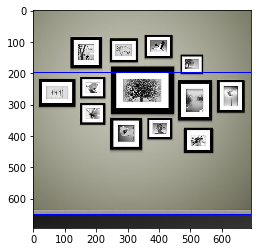

In [4]:
# imports
import numpy as np
import cv2
import matplotlib.pyplot as plt


# The Hough Transform is a popular algorithm for detecting any shape that can
# be represented in a parametric mathmatical form in binary images. This
# usually means that images need to be thresholded or filtered prior to running
# the Hough Transform.

# read in shapes image and convert to grayscale
shapes = cv2.imread('wall.jpg')
#cv2.imshow('Original Image', shapes)
#cv2.waitKey(0)
#cv2.destroyAllWindows()
shapes_grayscale = cv2.cvtColor(shapes, cv2.COLOR_RGB2GRAY)

# blur image (this will help clean up noise for Canny Edge Detection)
# see Chapter 2.0 for Guassian Blur or check OpenCV documentation
shapes_blurred = cv2.GaussianBlur(shapes_grayscale, (5, 5), 1.5)

# find Canny Edges and show resulting image
canny_edges = cv2.Canny(shapes_blurred, 100, 200)
#cv2.imshow('Canny Edges', canny_edges)
#cv2.waitKey(0)
#cv2.destroyAllWindows()
########################################### HOUGH LINES FROM SCRATCH USING NUMPY
# Step 1: The Hough transform needs a binary edges images.  For this particular
# python file, I used the openCV built in Class Canny to create this edge image
# from the original shapes.png file.

# This is the function that will build the Hough Accumulator for the given image
def hough_lines_acc(img, rho_resolution=1, theta_resolution=1):
    ''' A function for creating a Hough Accumulator for lines in an image. '''
    height, width = img.shape # we need heigth and width to calculate the diag
    img_diagonal = np.ceil(np.sqrt(height**2 + width**2)) # a**2 + b**2 = c**2
    rhos = np.arange(-img_diagonal, img_diagonal + 1, rho_resolution)
    thetas = np.deg2rad(np.arange(-90, 90, theta_resolution))

    # create the empty Hough Accumulator with dimensions equal to the size of
    # rhos and thetas
    H = np.zeros((len(rhos), len(thetas)), dtype=np.uint64)
    y_idxs, x_idxs = np.nonzero(img) # find all edge (nonzero) pixel indexes

    for i in range(len(x_idxs)): # cycle through edge points
        x = x_idxs[i]
        y = y_idxs[i]

        for j in range(len(thetas)): # cycle through thetas and calc rho
            rho = int((x * np.cos(thetas[j]) +
                       y * np.sin(thetas[j])) + img_diagonal)
            H[rho, j] += 1

    return H, rhos, thetas


# This is a simple peaks function that just finds the indicies of the number
# of maximum values equal to num_peaks.  You have to be careful here though, if
# there's any noise in the image it will like create a 'pocket' of local maxima
# values.  This function ignores this and in turn has the tendancy to return
# multiple lines along an actual line in the image.
def hough_simple_peaks(H, num_peaks):
    ''' A function that returns the number of indicies = num_peaks of the
        accumulator array H that correspond to local maxima. '''
    indices =  np.argpartition(H.flatten(), -2)[-num_peaks:]
    return np.vstack(np.unravel_index(indices, H.shape)).T


# This more advance Hough peaks funciton has threshold and nhood_size arguments
# threshold will threshold the peak values to be above this value if supplied,
# where as nhood_size will surpress the surrounding pixels centered around
# the local maximum after that value has been assigned as a peak.  This will
# force the algorithm to look eslwhere after it's already selected a point from
# a 'pocket' of local maxima.
def hough_peaks(H, num_peaks, threshold=0, nhood_size=3):
    ''' A function that returns the indicies of the accumulator array H that
        correspond to a local maxima.  If threshold is active all values less
        than this value will be ignored, if neighborhood_size is greater than
        (1, 1) this number of indicies around the maximum will be surpessed. '''
    # loop through number of peaks to identify
    indicies = []
    H1 = np.copy(H)
    for i in range(num_peaks):
        idx = np.argmax(H1) # find argmax in flattened array
        H1_idx = np.unravel_index(idx, H1.shape) # remap to shape of H
        indicies.append(H1_idx)

        # surpess indicies in neighborhood
        idx_y, idx_x = H1_idx # first separate x, y indexes from argmax(H)
        # if idx_x is too close to the edges choose appropriate values
        if (idx_x - (nhood_size/2)) < 0: min_x = 0
        else: min_x = idx_x - (nhood_size/2)
        if ((idx_x + (nhood_size/2) + 1) > H.shape[1]): max_x = H.shape[1]
        else: max_x = idx_x + (nhood_size/2) + 1

        # if idx_y is too close to the edges choose appropriate values
        if (idx_y - (nhood_size/2)) < 0: min_y = 0
        else: min_y = idx_y - (nhood_size/2)
        if ((idx_y + (nhood_size/2) + 1) > H.shape[0]): max_y = H.shape[0]
        else: max_y = idx_y + (nhood_size/2) + 1

        # bound each index by the neighborhood size and set all values to 0
        for x in range(int(min_x), int(max_x)):
            for y in range(int(min_y), int(max_y)):
                # remove neighborhoods in H1
                H1[y, x] = 0

                # highlight peaks in original H
                if (x == min_x or x == (max_x - 1)):
                    H[y, x] = 255
                if (y == min_y or y == (max_y - 1)):
                    H[y, x] = 255

    # return the indicies and the original Hough space with selected points
    return indicies, H


# a simple funciton used to plot a Hough Accumulator
def plot_hough_acc(H, plot_title='Hough Accumulator Plot'):
    ''' A function that plot a Hough Space using Matplotlib. '''
    fig = plt.figure(figsize=(10, 10))
    fig.canvas.set_window_title(plot_title)
    	
    plt.imshow(H, cmap='jet')

    plt.xlabel('Theta Direction'), plt.ylabel('Rho Direction')
    plt.tight_layout()
    plt.show()


# drawing the lines from the Hough Accumulatorlines using OpevCV cv2.line
def hough_lines_draw(img, indicies, rhos, thetas):
    ''' A function that takes indicies a rhos table and thetas table and draws
        lines on the input images that correspond to these values. '''
    for i in range(len(indicies)):
        for j in range(len(indicies)):
            # reverse engineer lines from rhos and thetas
            rho = rhos[indicies[i][0]]
            theta = thetas[indicies[i][1]]
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a*rho
            y0 = b*rho
            # these are then scaled so that the lines go off the edges of the image
            x1 = int(x0 + 1000*(-b))
            y1 = int(y0 + 1000*(a))
            x2 = int(x0 - 1000*(-b))
            y2 = int(y0 - 1000*(a))
            cv2.line(img, (x1, y1), (x2, y2), (0, 0, 255), 2)


# run hough_lines_accumulator on the shapes canny_edges image
H, rhos, thetas = hough_lines_acc(canny_edges)
indicies, H = hough_peaks(H, 2, nhood_size=11) # find peaks
#plot_hough_acc(H) # plot hough space, brighter spots have higher votes
hough_lines_draw(shapes, indicies, rhos, thetas)

# Show image with manual Hough Transform Lines
#cv2.imshow('Major Lines: Manual Hough Transform', shapes)
#cv2.waitKey(0)
#cv2.destroyAllWindows()
plt.subplot(111) 
plt.imshow(shapes)
plt.show()